In [2]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Cargar librerias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías para implementar modelo
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 

# librerías para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

1.	Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [9]:
#Cargamos el dataset y mostramos las 5 primeras filas de datos
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Información general del dataset
print(data.info())
# Resumen estadístico
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

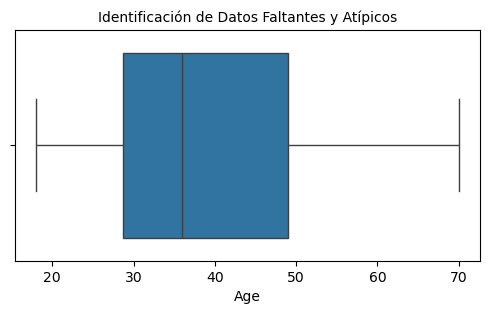

In [12]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

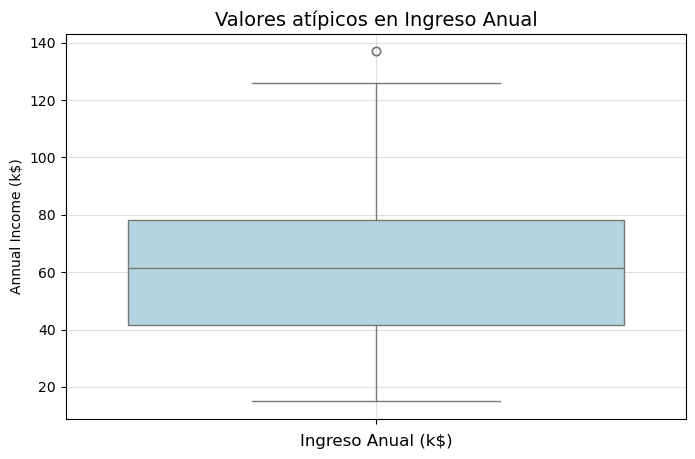

In [18]:
# Boxplot para identificar valores atípicos en Ingreso Anual
plt.figure(figsize=(8, 5))
sns.boxplot(data=data['Annual Income (k$)'], color='lightblue')
plt.title('Valores atípicos en Ingreso Anual', fontsize=14)
plt.xlabel('Ingreso Anual (k$)', fontsize=12)
plt.grid(alpha=0.4)
plt.show()

2.	Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [22]:
# Verificar valores nulos
print("\nValores nulos por columna:\n", data.isnull().sum())
# Verificar duplicados
print("\nCantidad de filas duplicadas:", data.duplicated().sum())


Valores nulos por columna:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Cantidad de filas duplicadas: 0


In [23]:
# Codificar la columna de género, Masculino 0, Femenino 1
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [25]:
#Eliminar valores atípicos
q1 = data['Annual Income (k$)'].quantile(0.25)
q3 = data['Annual Income (k$)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar datos dentro de los límites
data = data[(data['Annual Income (k$)'] >= lower_bound) & (data['Annual Income (k$)'] <= upper_bound)]

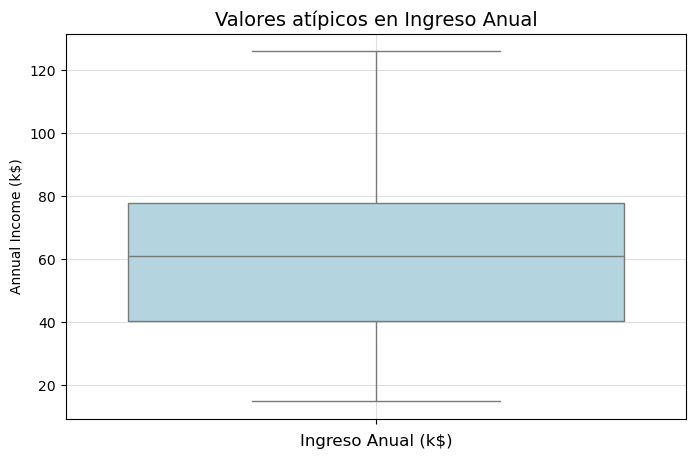

In [26]:
# Boxplot para identificar valores atípicos en Ingreso Anual
plt.figure(figsize=(8, 5))
sns.boxplot(data=data['Annual Income (k$)'], color='lightblue')
plt.title('Valores atípicos en Ingreso Anual', fontsize=14)
plt.xlabel('Ingreso Anual (k$)', fontsize=12)
plt.grid(alpha=0.4)
plt.show()

In [28]:
# Información general del dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              198 non-null    int64
 1   Gender                  198 non-null    int64
 2   Age                     198 non-null    int64
 3   Annual Income (k$)      198 non-null    int64
 4   Spending Score (1-100)  198 non-null    int64
dtypes: int64(5)
memory usage: 9.3 KB
None


3.	Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

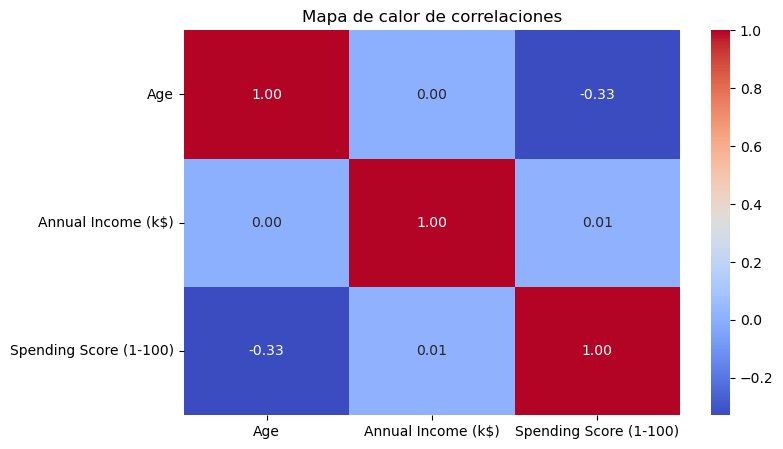

In [34]:
# Calcular la matriz de correlación
corr = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

# (Opcional) Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlaciones')
plt.show()

In [35]:
# Selección de características con SelectKBest
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = None

selected_features = X.columns.tolist()  # Mantener todas al no tener etiquetas

print(f"Características seleccionadas: {selected_features}")

Características seleccionadas: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


4.	Entrenar el modelo configurando los diferentes hiperparámetros. 

In [38]:
# Seleccionar las columnas numéricas
numerical_data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Crear una instancia del escalador
scaler = StandardScaler()

# Aplicar la estandarización
scaled_data = scaler.fit_transform(numerical_data)

# Convertir los datos estandarizados a un DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

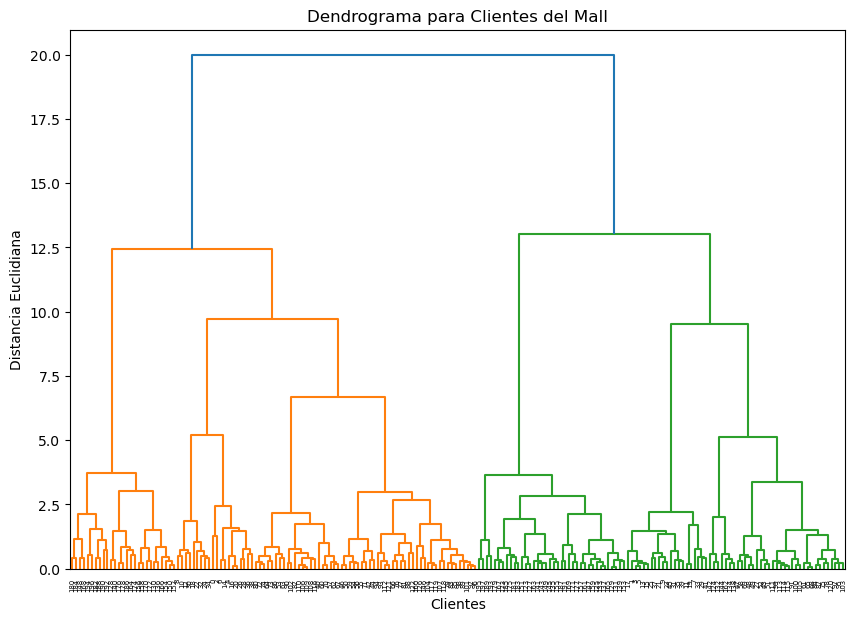

In [39]:
#linkage utilizando los datos estandarizados
Z = linkage(scaled_data_df, method='ward')

# Mostrar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrograma para Clientes del Mall")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclidiana")
plt.show()

In [41]:
# Configuración de los hiperparámetros
n_clusters = 5  # Número de clusters
linkage = 'ward'  # Método de vinculación

# Crear el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)

# Entrenar el modelo
model.fit(scaled_data_df)

# Obtener las etiquetas (clusters asignados)
labels = model.labels_

# Mostrar las etiquetas para cada cliente
data['Cluster'] = labels
print(data[['CustomerID', 'Cluster']].head())

   CustomerID  Cluster
0           1        4
1           2        0
2           3        4
3           4        0
4           5        4


5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc. 

In [42]:
# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.4006897229885412
Índice de Calinski-Harabasz: 106.66234821726492
Índice de Davies-Bouldin: 0.929268277459507


6. Realizar diferentes gráficas que permitan visualizar los resultados del modelo.

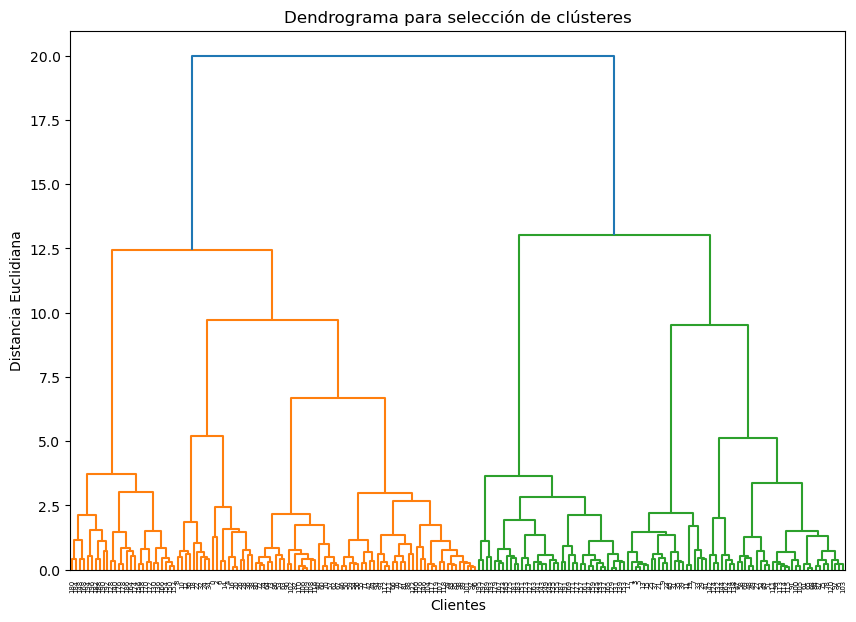

In [47]:
import scipy.cluster.hierarchy as sch

# Crear el dendrograma
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrograma para selección de clústeres')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()

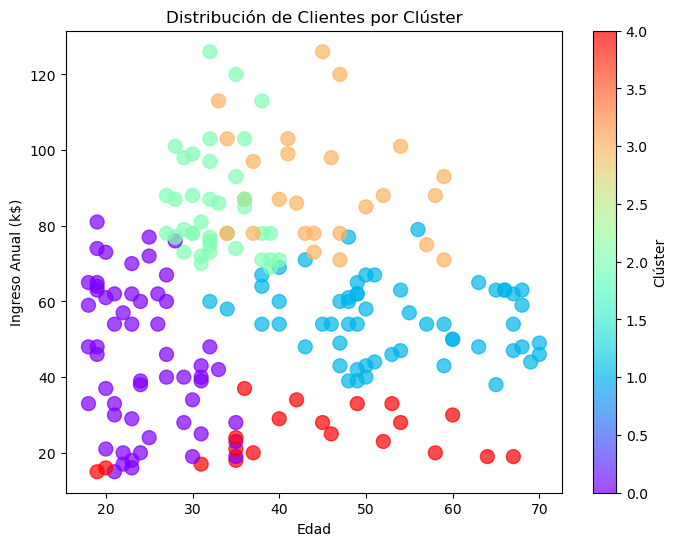

In [52]:
# Gráfico de dispersión con los clústeres coloreados
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Annual Income (k$)'], c=labels, cmap='rainbow', s=100, alpha=0.7)
plt.title('Distribución de Clientes por Clúster')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.colorbar(label='Clúster')
plt.show()

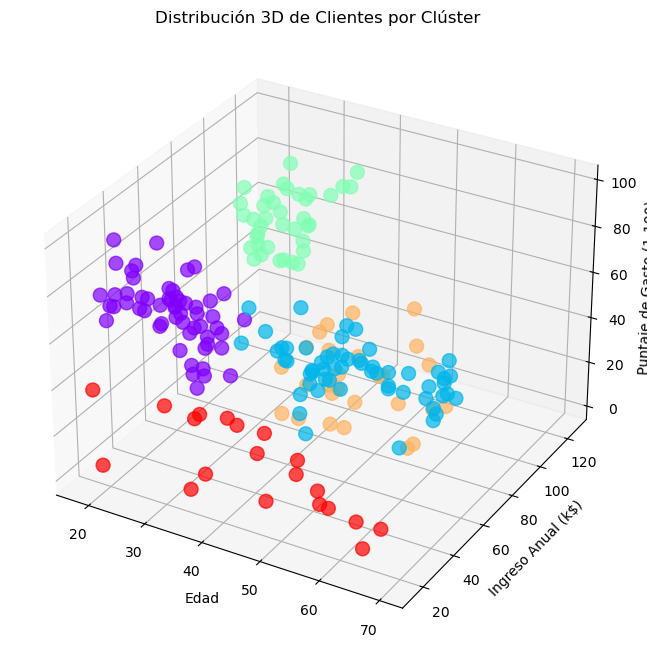

In [50]:
from mpl_toolkits.mplot3d import Axes3D

# Gráfico de dispersión en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c=labels, cmap='rainbow', s=100, alpha=0.7)
ax.set_xlabel('Edad')
ax.set_ylabel('Ingreso Anual (k$)')
ax.set_zlabel('Puntaje de Gasto (1-100)')
plt.title('Distribución 3D de Clientes por Clúster')
plt.show()

Silhouette Score: 0.4006897229885412


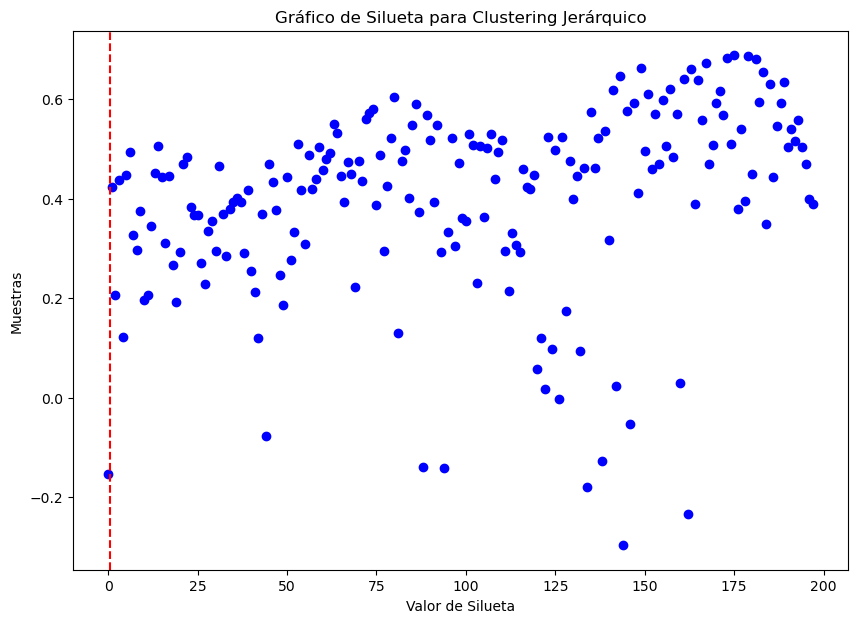

In [55]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcular la puntuación promedio de la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Obtener los valores de silueta para cada muestra
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)

# Crear el gráfico de silueta
fig, ax = plt.subplots(figsize=(10, 7))

# Graficar los valores de silueta de cada muestra
ax.plot(sample_silhouette_values, 'bo')

# Añadir una línea vertical para el valor promedio de la silueta
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Títulos y etiquetas
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")

# Mostrar el gráfico
plt.show()